In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.26.0
3.8.0
1.11.2


# Non-linear differential equation

$ y'' - x \sqrt{y} = 0, ~ 0 \leq x \leq 1 $

$ y(0) = 0, ~y(1) = 2 $

In [2]:
def rungekutta_explicit(f, y0, x0, x_end, h): # from the previous lab
    xn = x0
    yn = y0
    y = list()
    x = list()

    while xn < x_end:
        k1 = f(xn, yn) #RK4
        k2 = f(xn + h/2, yn + h/2 * k1)
        k3 = f(xn + h/2, yn + h/2 * k2)
        k4 = f(xn + h, yn + h * k3)

        yn1 = yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        y.append(yn)
        x.append(xn)

        xn += h
        yn = yn1

    y = np.array(y)
    x = np.array(x)

    return x, y

## Shooting method
The equation above can be reduced to a system. Replacement:

$ z_1 = y, ~ z_2 = y' $

System:

$ z'_1  = z_2 $

$ z'_2 = x \times \sqrt{z_1} $

$ z_1(0) = 0, ~z_2(0) = \alpha $

In [3]:
def shooting(a0, F, h):
    an = a0

    while not np.isclose(F(an), 0, 0.001):
        an -= F(an) / ((F(an + h) - F(an)) / h) # from Aristova II

    return an

In [4]:
x0 = 0
x1 = 1
y1 = 2
h = 0.001

def f1(x, y):
    f = np.array(np.zeros(2))
    f[0] = y[1]
    f[1] = x * (y[0]**0.5)

    return f

def F1(a):
    x_arr, y_arr = rungekutta_explicit(f1, [0, a], x0, x1, h)
    x = x_arr[-1]
    y = y_arr[-1]

    return (y[1] / x)**2 - y1 # y(x = 1, a) - y(1)

In [5]:
a = shooting(a0=0, F=F1, h=h)
x, y = rungekutta_explicit(f1, [0, a], 0, 1, h)

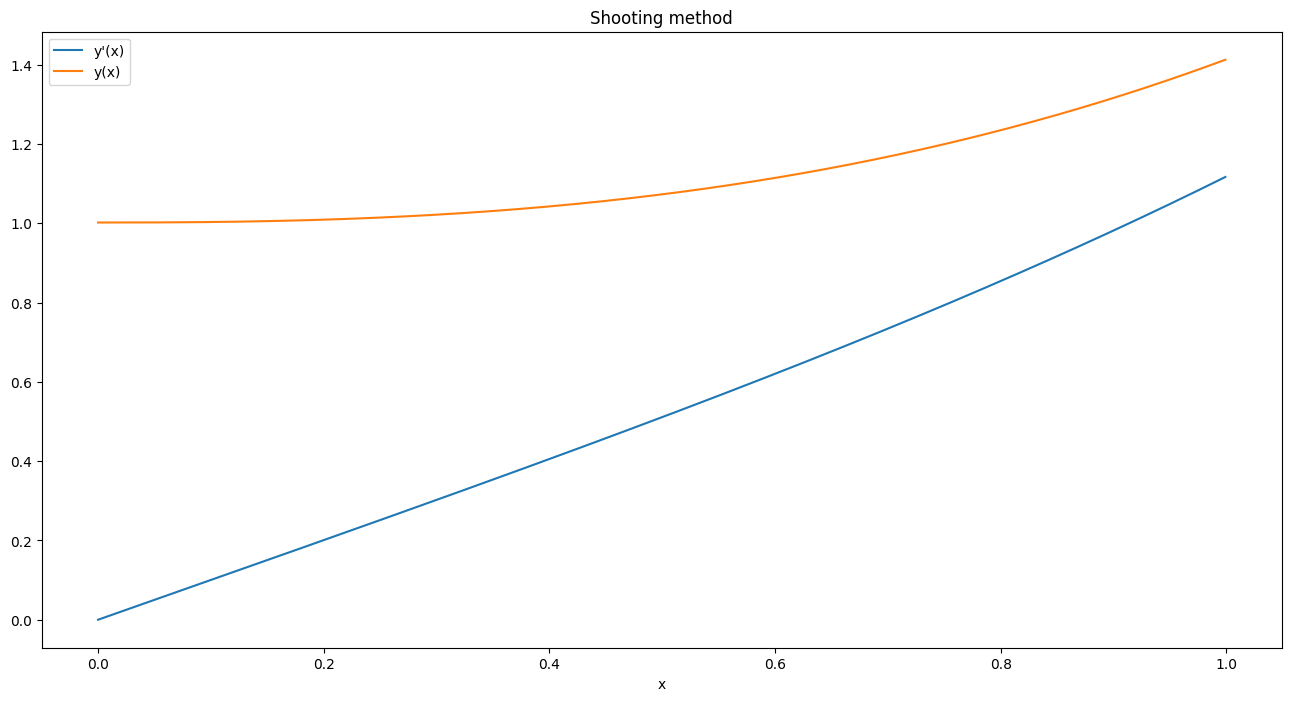

In [6]:
plt.figure(figsize=(16, 8))
plt.title(f"Shooting method")
plt.plot(x, y[:, 0], label="y'(x)")
plt.plot(x, y[:, 1], label="y(x)")
plt.xlabel("x")
plt.legend()

## Quasilinearization method
$ y(x) = y_0(x) + v (x) $


$ y_0(0) = 0 \text{, } y_0(1) = 2 $

By picking $ y_0(x) = 2x $ we can get:


$ v'' = \frac{xv}{2\sqrt{2x + v}} + x\sqrt{2x + v} $

$ v(0) = v(1) = 0, ~v'(1) = \alpha $

Replacement:

$ v_1 = v, ~v_2 = v' $

System:

$ v'_1 = v_2 $

$ v'_2 = \frac{xv_1}{2\sqrt{2x + v_1}} + x\sqrt{2x + v_1} $

$ v_1(0) = 0 \text{, } v_2(0) = \alpha $

In [7]:
h = 0.01
a = 0
x0 = 0
x1 = 1
#y1 = 2

def f2(x, v):
    f = np.array(np.zeros(2))
    f[0] = v[1]
    f[1] = x*v[0]/(2*((2*x + v[0])**0.5)) + x*((2*x + v[0])**0.5)

    return f

def F2(a):
    x_arr, v_arr = rungekutta_explicit(f2, [1e-6, a], 0, 1, h)
    x = x_arr[-1]
    v = v_arr[-1]
    
    return v[0]

In [8]:
a = shooting(a0=0, F=F2, h=h)
x, v = rungekutta_explicit(f2, [1e-6, a], x0, x1, h)

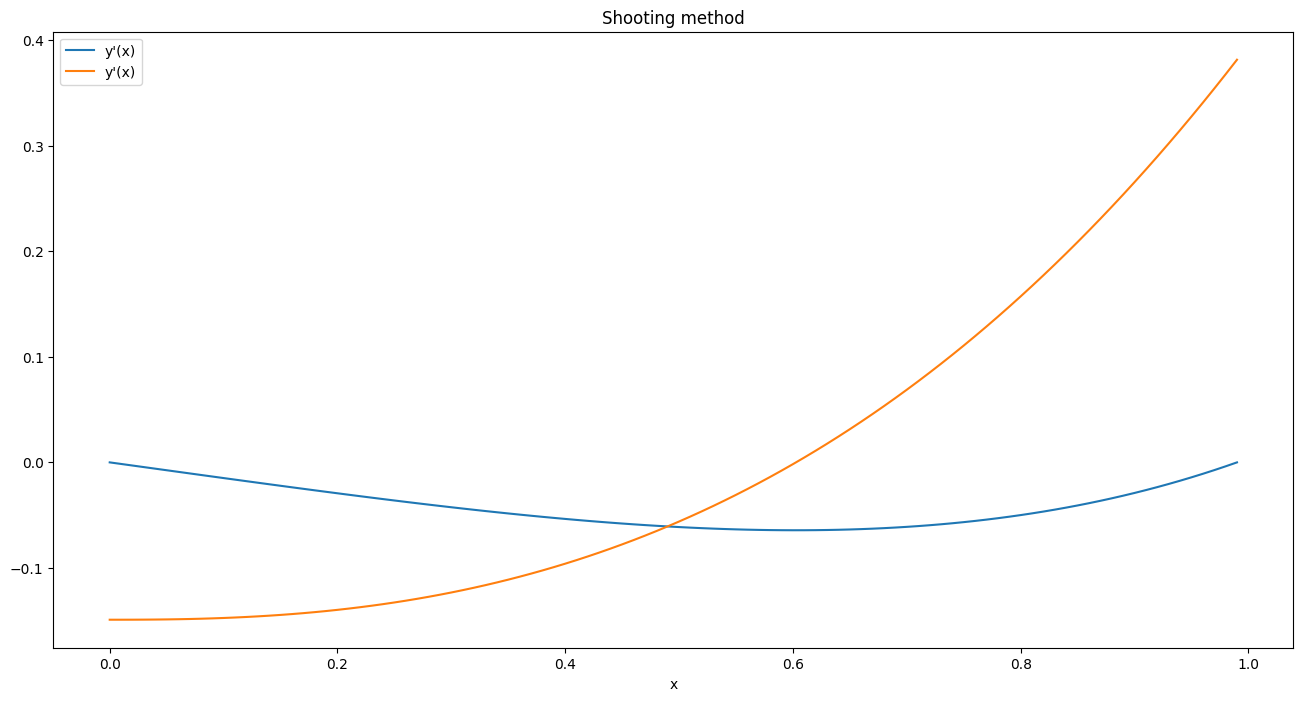

In [9]:
plt.figure(figsize=(16, 8))
plt.title(f"Shooting method")
plt.plot(x, v, label="y'(x)")

plt.xlabel("x")
plt.legend()

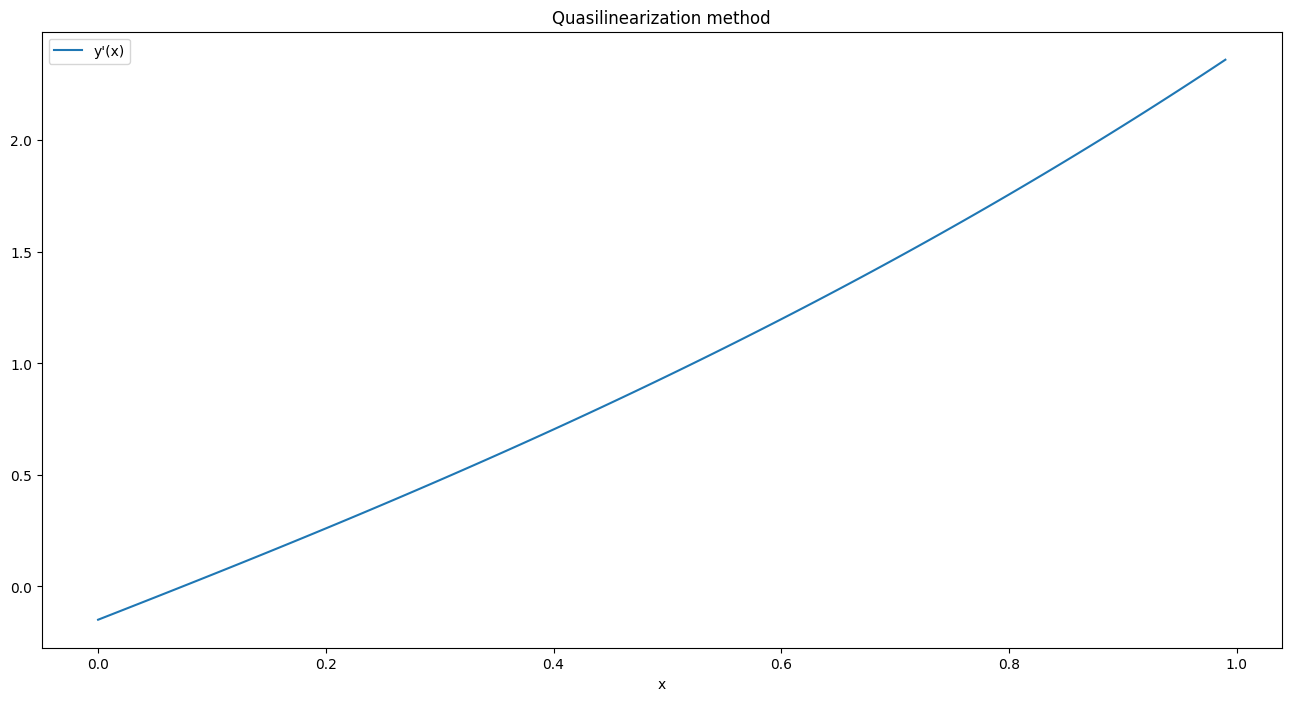

In [10]:
y0 = 2*x
y = y0 + v[:, 1]

plt.figure(figsize=(16, 8))
plt.title("Quasilinearization method")
plt.plot(x, y, label="y'(x)")
plt.xlabel('x')
plt.legend()